# Rezolvarea sistemelor supradeterminate. Aplicatia: Clasificarea binara cu cmmp


## Triangularizare ortogonală cu reflectori

### Reflectori elementari

<i>**Definiţie:**</i> Un **reflector elementar** (sau *Householder*) de ordin $m$ şi indice $k$ este o matrice $U_k \in \mathbb{R}^{m \times m}$, de forma

$$
U_k=I_m-\frac{1}{\beta_k} u_k u_k^T
$$

unde $u_k \in \mathbb{R}^m$ este vectorul

$$
u_k=\left[\begin{array}{lllll}
\underbrace{0 \ldots 0}_{k-1} & u_{k k} & u_{k+1, k} & \ldots & u_{m k}
\end{array}\right]^T
$$

şi

$$
\beta_k=\left\|u_k\right\|^2 / 2 .
$$


Principalele proprietăţi ale transformărilor Householder sunt date în următoarea teoremă.
**Teorema**

a) Un reflector elementar $U_k \in \mathbb{R}^{m \times m}$ este o matrice *simetrică* şi *ortogonală*.

b) Dându-se un reflector elementar $U_k$ şi un vector $x \in \mathbb{R}^m$, produsul lor $y=U_k x$ se poate calcula prin

$$
y_i= \begin{cases}x_i, & i=1: k-1 \\ x_i-\tau u_{i k}, & i=k: m\end{cases}
$$

unde

$$
\tau=\frac{1}{\beta_k} \sum_{i=k}^m u_{i k} x_i .
$$

c) Dându-se un indice $k \in 1: m-1$ şi un vector $x \in \mathbb{R}^m$ astfel încât

$$
\sigma^{\underline{2}}=\sum_{i=k}^m x_{\underline{i}}^2 \neq 0
$$

reflectorul $U_k$ cu ajutorul căruia se pot introduce zerouri în poziţiile $k+1: m$ ale vectorului $x$, mai precis care satisface relaţia

$$
\left(U_k x\right)_i= \begin{cases}x_i, & i=1: k-1 \\ -\sigma, & i=k \\ 0, & i=k+1: m\end{cases}
$$

este definit de vectorul $u_k \in \mathbb{R}^m$ dat de
\begin{aligned}
&u_{i k}= \begin{cases}0, & i=1: k-1 \\ x_k+\sigma, & i=k \\ x_i, & i=k+1: m\end{cases}
\end{aligned}
şi scalarul
$$ \beta_k=\sigma u_{k k}. $$

### Triangularizarea ortogonala (Alg. TORT)

Rezolvarea problemei CMMP într-o manieră stabilă din punct de vedere numeric necesită o procedură pentru reducerea matricelor la formă triunghiulară prin transformări ortogonale.

Teorema 4.3 Fie $A \in \mathbb{R}^{m \times n}$, cu $m \geq n$; atunci există reflectorii elementari $U_1$, $U_2, \ldots, U_p$, unde $p=\min (m-1, n)$, astfel încât

$$
U_p \ldots U_2 U_1 A=R \quad \quad (1)
$$

unde $R$ este superior triunghiulară.

**Algoritm 4.4** (**TORT - triangularizare ortogonală cu reflectori**) (Dată o matrice $A \in \mathbb{R}^{m \times n}$, algoritmul suprascrie matricea $A$ cu matricea superior triunghiulară $R$ şi calculează vectorii $u_k=U(:, k)$ şi scalarii $\beta_k$ care definesc reflectorii elementari $U_k, k \in 1: p, p=\min (m-1, n)$, astfel încât are loc (1).)

1. $p=\min (m-1, n)$
2. **pentru** $k=1: p$
    1. $\sigma \leftarrow \operatorname{sign}\left(a_{k k}\right) \cdot \sqrt{\sum_{i=k}^m a_{i k}^2}$
    2. **dacă** $\sigma=0$ **atunci** $\beta_k \leftarrow 0$
       **altfel**
        1. $U(k, k) \leftarrow u_{k k}=a_{k k}+\sigma$
        2. **pentru** $i=k+1: m$
            1. $U(i, k) \leftarrow u_{i k}=a_{i k}$
        3. $\beta_k \leftarrow \sigma u_{k k}$
        4. $a_{k k} \leftarrow r_{k k}=-\sigma$
        5. (**pentru** $i=k+1: m$
            1. $a_{i k} \leftarrow 0$ )
        6. **pentru** $j=k+1: n$
            1. $\tau \leftarrow\left(\sum_{i=k}^m u_{i k} a_{i j}\right) / \beta_k$
            2. **pentru** $i=k: m$
                  1. $a_{i j} \leftarrow a_{i j}-\tau u_{i k}$


## Problema celor mai mici patrate

Fie $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$ date. Considerăm sistemul liniar supradeterminat ( $m>n$ )

$$
A x=b .
$$


În general, un astfel de sistem, având mai multe ecuaţii decât necunoscute, nu are soluţii. O reformulare naturală a rezolvării sistemului este problema găsirii unui vector $x \in \mathbb{R}^n$ astfel încât vectorul $y=A x$ să fie cât mai aproape posibil de vectorul b. Când apropierea este definită de norma euclidiană, se obţine problema celor mai mici pătrate (CMMP):

$$
\min _{x \in \mathbb{R}^n}\|r\|=\min _{x \in \mathbb{R}^n}\|b-A x\|  \quad \quad (2).
$$


Vectorul $r=b-A x$ este numit reziduu, iar norma lui este minimizată.

### Rezolvarea problemei CMMP

Condiţiile în care problema CMMP are o soluţie şi când această soluţie este unică sunt date de următoarea teoremă.

**Teorema** Fie date $A \in \mathbb{R}^{m \times n}$ şi $b \in \mathbb{R}^m$, cu $m>n$. Problema CMMP (2) admite întotdeauna o soluţie. Soluţia este unică dacă şi numai dacă matricea A are coloanele liniar independente, adică are rang maxim. In acest caz soluţia CMMP a sistemului supradeterminat $A x=b$ poate fi scrisă în forma

$$
x^*=\left(A^T A\right)^{-1} A^T b  \quad \quad (3).
$$


Relaţia (3) este utilizabilă direct doar pentru matrice de dimensiuni mici. Un mijloc de calcul numeric stabil a soluţiei CMMP constă în triangularizarea ortogonală a matricei sistemului (algoritmul TORT din secţiunea precedentă). Notăm $U=U_p \ldots U_2 U_1$ în (1) şi observăm că putem scrie

$$
R=\left[\begin{array}{c}
R^{\prime} \\
0
\end{array}\right],
$$

cu $R^{\prime}$ o matrice pătrată $n \times n$ superior triunghiulară. Matricea $R$ are coloanele liniar independente întrucât $A$ are această proprietate şi, deci, $R^{\prime}$ este o matrice nesingulară. Transformările ortogonale conservând norma euclidiană, avem

$$
\|b-A x\|=\|U(b-A x)\|=\|d-R x\| \quad \quad (4),
$$

unde $d=U b$. Folosind partitia
$$
d=\left[\begin{array}{c}
d^{\prime} \\
d^{\prime \prime}
\end{array}\right]
$$

unde $d^{\prime} \in \mathbb{R}^n$ şi $d^{\prime \prime} \in \mathbb{R}^{m-n}$, relaţia (4) poate fi scrisă

$$
\|b-A x\|=\left\|\left[\begin{array}{c}
d^{\prime}-R^{\prime} x \\
d^{\prime \prime}
\end{array}\right]\right\|=\sqrt{\left\|d^{\prime}-R^{\prime} x\right\|^2+\left\|d^{\prime \prime}\right\|^2},
$$

care este minimă când $d^{\prime}-R^{\prime} x=0$. Deci, soluţia CMMP a sistemului supradeterminat $A x=b$ poate fi calculată rezolvând sistemul superior triunghiular nesingular

$$
R^{\prime} x=d^{\prime}
$$





### [Exercitiu]:  (2p) Adaptati algoritmul cmmp 4.6 din documentatie pentru a rezolva sistemul Ax = b, unde matricea A are structura speciala de mai jos.

In [13]:
import numpy as np
rng = np.random.default_rng(0)

# ----------- Input ---------------------------
#  !! Sectiunea Input nu se modifica !!
m = 7 # nr de linii
n = 4 # nr de coloane
A = rng.integers(1,11, size=(m,n))
A = np.triu(A,-1)
A[m-1,:] = rng.integers(1,10, size=(1,n))
A = A.astype(float)
b = rng.integers(10, size=(m,1)).astype(float)
#-----------------------------------------------
print('------------A-------------\n', A)
print('------------b-------------\n', b.T)

------------A-------------
 [[ 9.  7.  6.  3.]
 [ 4.  1.  1.  1.]
 [ 0.  9.  7. 10.]
 [ 0.  0. 10.  8.]
 [ 0.  0.  0. 10.]
 [ 0.  0.  0.  0.]
 [ 7.  7.  8.  2.]]
------------b-------------
 [[0. 8. 0. 5. 0. 2. 4.]]


In [ ]:
def tort(A):
  m, n = A.shape

  # p = min(m - 1, n), dar m>n pt cmmp
  p = n

  U = np.zeros((m,n))
  beta = np.zeros((p,1))

  R = A.copy().astype(float)

  for k in range(p):
    index_list = {k, k + 1, m - 1}
    index = [i for i in index_list if i < m]

    # sigma = sign(A[k,k]) * ||A[k:m, k]||
    sigma = np.sign(R[k,k]) * np.linalg.norm(R[index, k])
    # daca sigma == 0, beta_k = 0, altfel
    if sigma == 0:
      beta[k] = 0
    else:
      U[k,k] = R[k,k] + sigma

      for i in index:
        if i > k: # skip coloana
          U[i,k] = R[i,k]

      beta[k] = sigma * U[k,k]
      R[k,k] = -sigma

      for i in index:
        if i > k:
          R[i,k] = 0

      for j in range(k + 1, n):
        # tau = (sum_{i=k}^{m-1} U[i,k] * A[i,j]) / beta_k
        tau = sum(U[i,k] * R[i,j] for i in index) / beta[k]
        
        for i in index:
          R[i,j] = R[i,j] - tau * U[i,k]

  return R, U, beta

In [52]:
def utris(U, b):
  n = U.shape[0]
  x = b.copy()

  for i in range(n - 1, -1, -1):
    s = x[i]

    for j in range(i + 1, n):
      s = s - U[i, j] * x[j]
        
    x[i] = s / U[i, i]
  
  return x

In [55]:
def cmmp(A, b):
  # returns Ax=b solution, with m > n
  m, n = A.shape

  # triangularizarea ortogonala a lui A
  R, U, beta = tort(A)

  # calculul vertorului d care suprascrie b
  d = b.copy().astype(float)
  for k in range(n):
    index_list = {k, k + 1, m - 1}
    index = [i for i in index_list if i < m]

    tau = sum(U[i,k] * d[i] for i in index) / beta[k]

    for i in index:
      d[i] = d[i] - tau * U[i,k]

  # calculul solutiei cmmp
  x = utris(R[:n, :], d[:n])

  return x


In [57]:
x = cmmp(A, b)
x_numpy, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print('------------x-------------\n', x)
print('-----------np x-----------\n', x)

index: [0, 1, 6]
index: [1, 2, 6]
index: [2, 3, 6]
index: [3, 4, 6]
------------x-------------
 [[ 0.5026913 ]
 [-0.58716766]
 [ 0.44423577]
 [ 0.09056978]]
-----------np x-----------
 [[ 0.5026913 ]
 [-0.58716766]
 [ 0.44423577]
 [ 0.09056978]]


/tmp/ipykernel_25580/1271861240.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R[i,j] = R[i,j] - tau * U[i,k]


## Aplicatie: Clasificarea binara cu cmmp

Se presupune ca avem exemple de semnale (vectori) din doua clase si dorim ca, pe baza lor, sa cream o **regula** prin care sa **clasificam semnale viitoare**.

Notam:
*  $N_1$, $N_2$ *numarul de vectori (de antrenare)* apartinand claselor $C_1$, respectiv $C_2$;
*  vectorii au dimensiune <i>n</i>.

Un clasicator foarte simplu este cel bazat pe **CMMP**. Atragem atentia ca exista metode de clasicare mai eficiente, dar si mai sofisticate.

Acesta construieste functia liniara:
$$
    f(v) = x_1^Tv+x_0,
$$
unde
* $v \in \mathbb{R}^n$  este un semnal de antrenare
* $x_1 \in  \mathbb{R}^{n}$ si $x_0 \in \mathbb{R}$ sunt **parametrii** inca **necunoscuti ai functiei**.

Pentru a afla acesti parametri, fixam ca obiectiv satisfacerea relatiei:
$$
f(v) = \begin{cases}
& 1, \quad v \in C_1\\
& -1, \quad v \in C_2
\end{cases}
$$
Desigur, aceasta relatie nu poate satisfacuta exact, de aceea cautam o solutie in sens CMMP. Notand  $\mathbf{1}_{N_1}$ un vector avand toate elementele egale cu 1 si dimensiune N, relatia de mai sus conduce la sistemul CMMP:

\begin{equation} \begin{bmatrix}
V_1 & \mathbf{1}_{N_1} \\
V_2 & \mathbf{1}_{N_2}
\end{bmatrix} \begin{bmatrix} x_1\\ x_0 \end{bmatrix} = \begin{bmatrix} \mathbf{1}_{N_1}\\ -\mathbf{1}_{N_2} \end{bmatrix}  ⇔ Ax =b
\end{equation}

in care $V_1 \in \mathbb{R}^{N_1 \times n}$  si $V_2 \in \mathbb{R}^{N_2 \times n}$ sunt matrice ale caror coloane sunt vectorii de antrenare din cele doua clase. Rezolvarea sistemului, a carui matrice are
dimensiunea (N1 + N2) x ( n + 1), produce valorile optime ale parametrilor c si d pentru aceasta metoda.

In [65]:
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Citirea datelor

Incarcam setul de date [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), ce contine 50 de masuratori pentru fiecare din cele 3 tipuri de flori : setosa, virginica si versicolor.

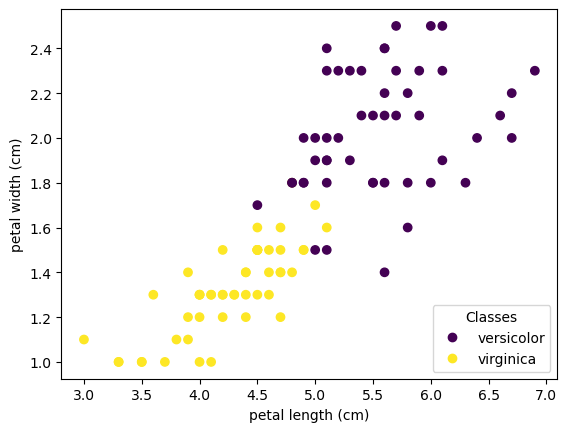

In [66]:
data = load_iris()
b = data.target[50:]
b[50:] = -1
V = data.data[50:,2:]

_, ax = plt.subplots()
scatter = ax.scatter(V[:, 0], V[:, 1], c=b)
ax.set(xlabel=data.feature_names[2], ylabel=data.feature_names[3])
_ = ax.legend( scatter.legend_elements()[0],data.target_names[1:], loc="lower right", title="Classes"
)


### [Exercitiu]
(0.2p) 1. Formulati problema CMMP conform celor discutate mai sus. Impartiti setul in date de antrenare 80% si testare 20%.

In [ ]:
ones = np.ones((V.shape[0], 1))

A = np.hstack((V, ones))

# Amestecam datele
perm = np.random.permutation(A.shape[0])
A = A[perm]
b = b[perm]

# [TO DO]: Impartim setul in date de antrenare(80%) si testare (20%)
nr_train = int(0.8 * A.shape[0]) # 80%
A_test = A[nr_train:, :]
A_train = A[:nr_train, :]

b_test = b[nr_train:]
b_train = b[:nr_train]

print(f"A_train shape: {A_train.shape}")
print(f"b_train shape: {b_train.shape}")

A_train shape: (80, 3)
b_train shape: (80,)


### [Exercitiu]:
(0.2p)Apelati functia de mai jos pentru a afla mai multe despre functia lstsq si folositi-o pentru a gasi solutia in sens CMMP.

In [69]:
help(np.linalg.lstsq)


Help on _ArrayFunctionDispatcher in module numpy.linalg:

lstsq(a, b, rcond=None)
    Return the least-squares solution to a linear matrix equation.

    Computes the vector `x` that approximately solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
    solutions, the one with the smallest 2-norm :math:`||x||` is returned.

    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of the `K` c

### [Exercitiu]:
 (0.4p) O data gasita solutia, aplicati regula de clasificare pe datele de test. Folositi [confusion_matrix](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.confusion_matrix.html) pentru a calcula matricea de confuzie. Vedeti urmatoarea sectiune pentru interpretarea ei.

In [ ]:
b_hat = # apply the classification rule to estimate the lables for the model
cm =  #call the confusion_matrix function

In [ ]:
# Plotting the confusion matrix as a heatmap
sns.heatmap( cm , annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 1", "Pred -1"], yticklabels=["True 1", "True -1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Criterii de performanta pentru clasificarea binara

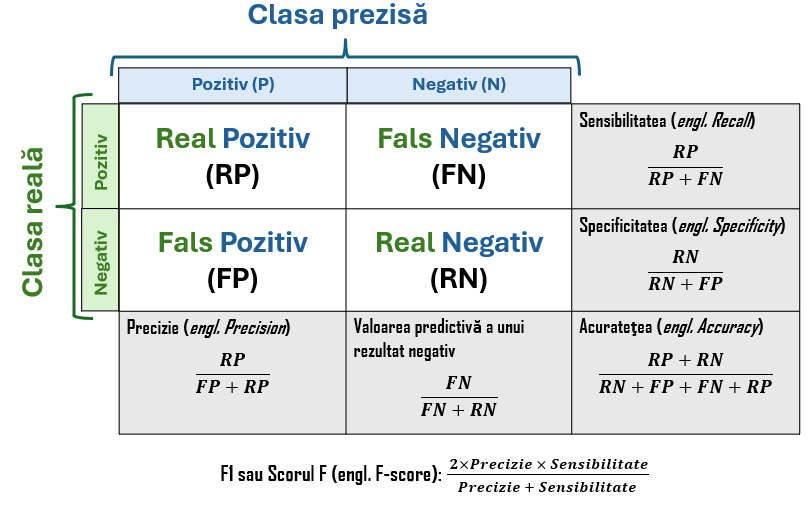

###[Exercitiu]: (0.2p) Calculati acuratetea clasificatorului pe baza matricei de confuzie
